In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-claims-fraud-data/vendor_data.csv
/kaggle/input/insurance-claims-fraud-data/insurance_data.csv
/kaggle/input/insurance-claims-fraud-data/employee_data.csv


In [2]:
import pandas as pd

# Path file CSV di Kaggle
vendor_file = '/kaggle/input/insurance-claims-fraud-data/vendor_data.csv'
insurance_file = '/kaggle/input/insurance-claims-fraud-data/insurance_data.csv'
employee_file = '/kaggle/input/insurance-claims-fraud-data/employee_data.csv'

# Membaca file CSV menjadi DataFrame
vendor_df = pd.read_csv(vendor_file)
insurance_df = pd.read_csv(insurance_file)
employee_df = pd.read_csv(employee_file)

# Menampilkan 5 baris pertama untuk cek
print(vendor_df.head())
print(insurance_df.head())
print(employee_df.head())


   VENDOR_ID              VENDOR_NAME                   ADDRESS_LINE1  \
0  VNDR00001  King, Proctor and Jones        2027 North Shannon Drive   
1  VNDR00002               Garcia Ltd          5701 East Shirley Lane   
2  VNDR00003               Cherry LLC            1217 Cottondale Road   
3  VNDR00004              Mays-Benson  227 West Montgomery Cross Road   
4  VNDR00005               Wilson PLC            23 North Hill Street   

  ADDRESS_LINE2          CITY STATE  POSTAL_CODE  
0            #5  Fayetteville    AR        72703  
1           NaN    Montgomery    AL        36117  
2           NaN    Montgomery    AL        36109  
3          #736      Savannah    GA        31406  
4           NaN     Nashville    TN        37210  
         TXN_DATE_TIME TRANSACTION_ID CUSTOMER_ID POLICY_NUMBER POLICY_EFF_DT  \
0  2020-06-01 00:00:00    TXN00000001   A00003822   PLC00008468    2015-06-23   
1  2020-06-01 00:00:00    TXN00000002   A00008149   PLC00009594    2018-04-21   
2  2020-06-0


========== EDA untuk Vendor Data ==========

1. Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VENDOR_ID      600 non-null    object
 1   VENDOR_NAME    600 non-null    object
 2   ADDRESS_LINE1  600 non-null    object
 3   ADDRESS_LINE2  97 non-null     object
 4   CITY           594 non-null    object
 5   STATE          600 non-null    object
 6   POSTAL_CODE    600 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.9+ KB
None

2. 5 baris pertama:
   VENDOR_ID              VENDOR_NAME                   ADDRESS_LINE1  \
0  VNDR00001  King, Proctor and Jones        2027 North Shannon Drive   
1  VNDR00002               Garcia Ltd          5701 East Shirley Lane   
2  VNDR00003               Cherry LLC            1217 Cottondale Road   
3  VNDR00004              Mays-Benson  227 West Montgomery Cross Road   
4  V

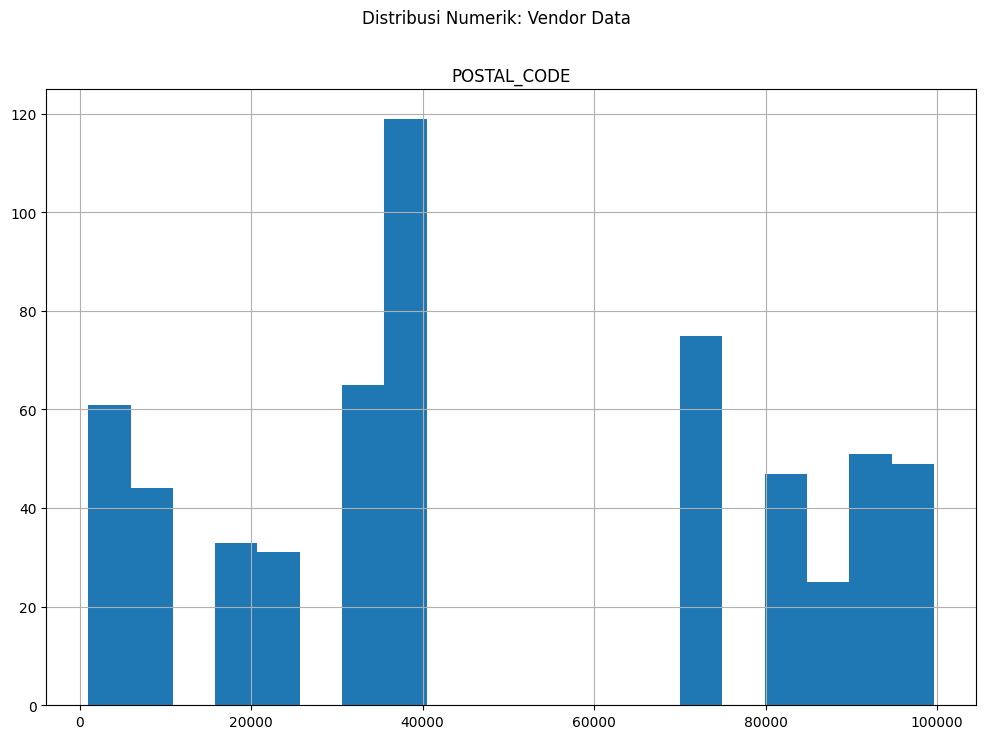

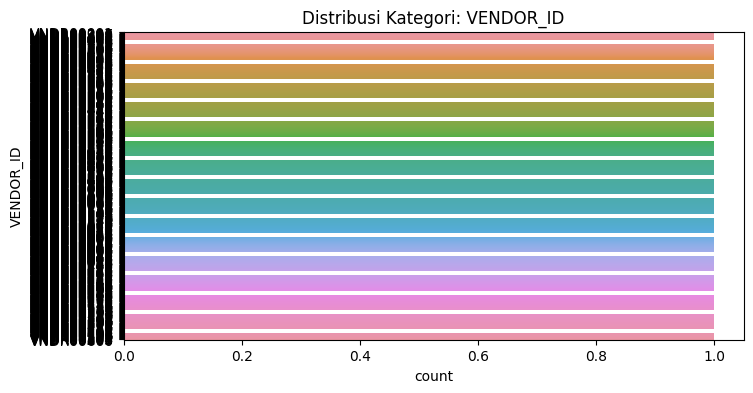

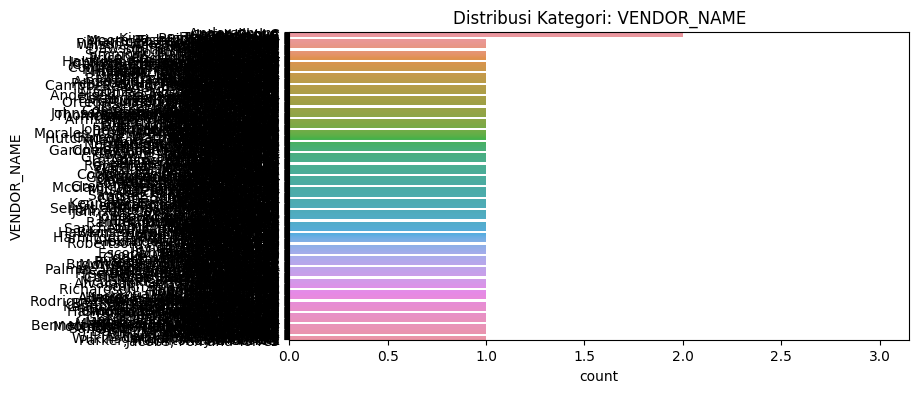

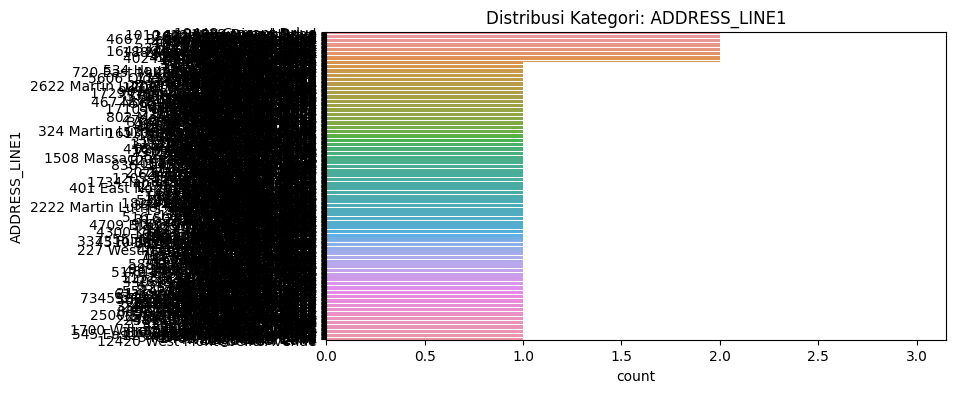

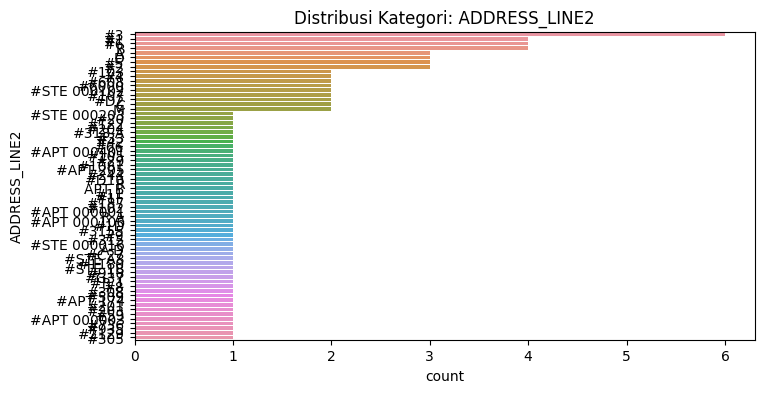

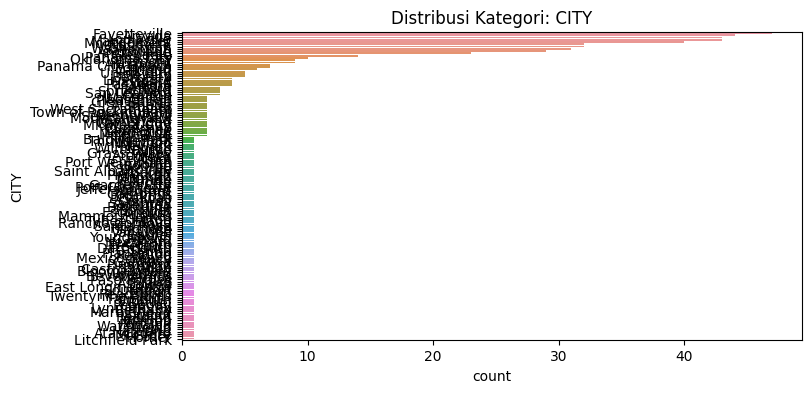

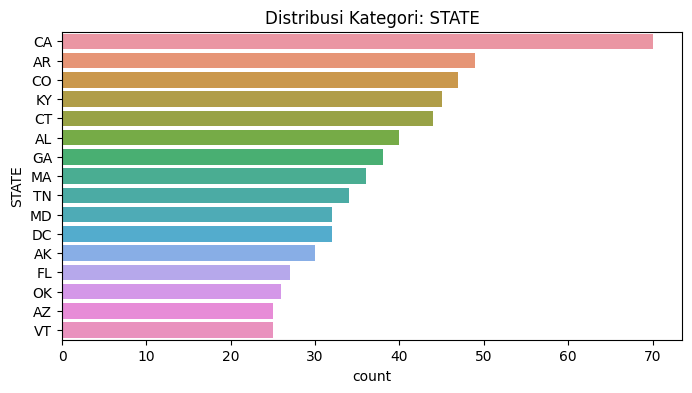


========== EDA untuk Insurance Data ==========

1. Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             1495 non-null   object 
 

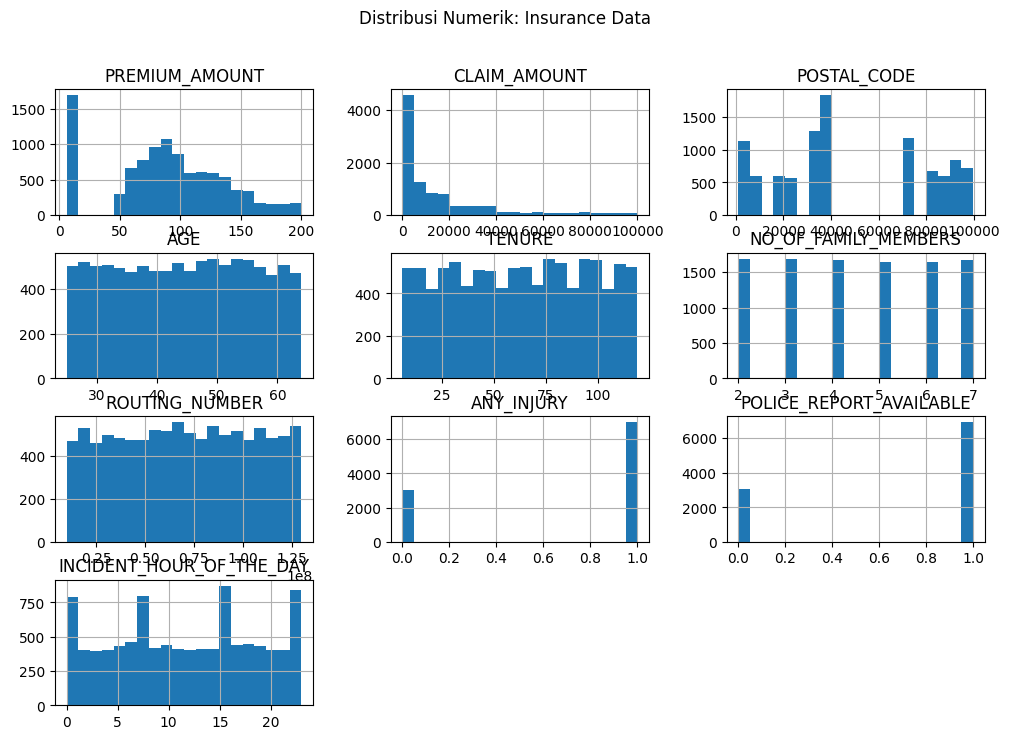

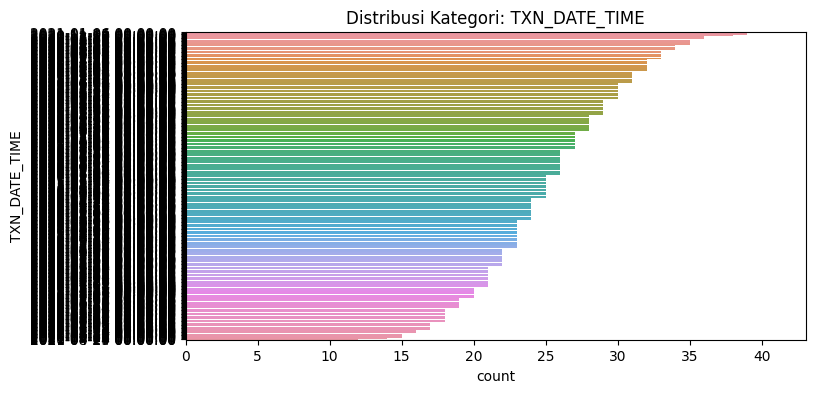

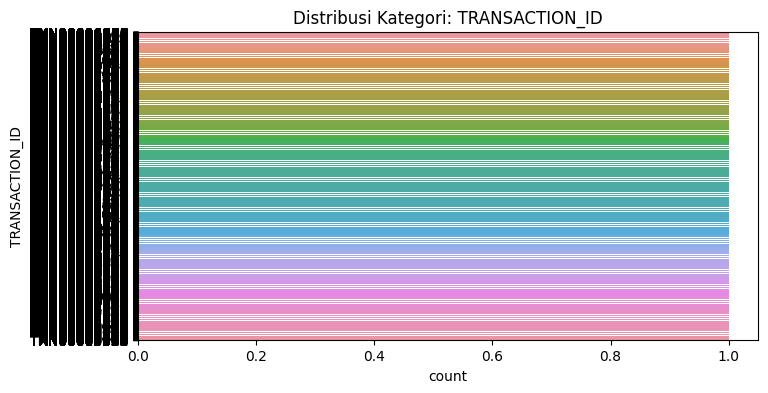

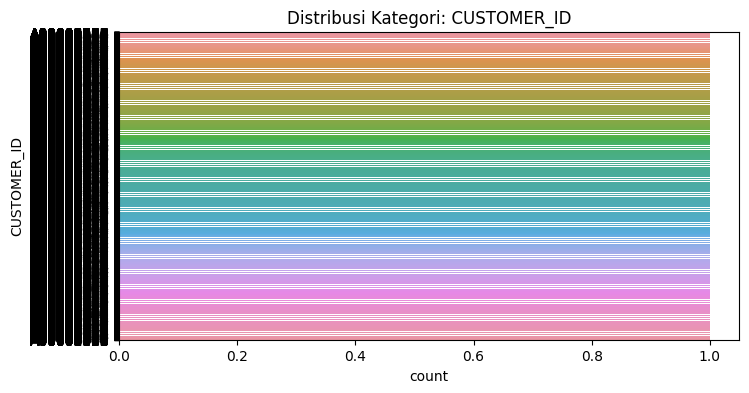

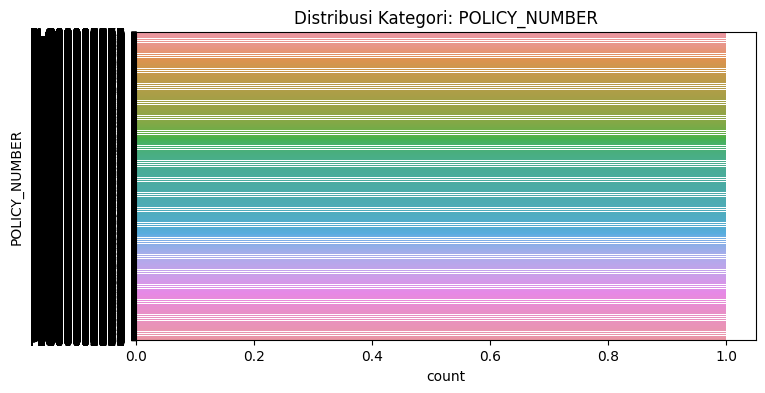

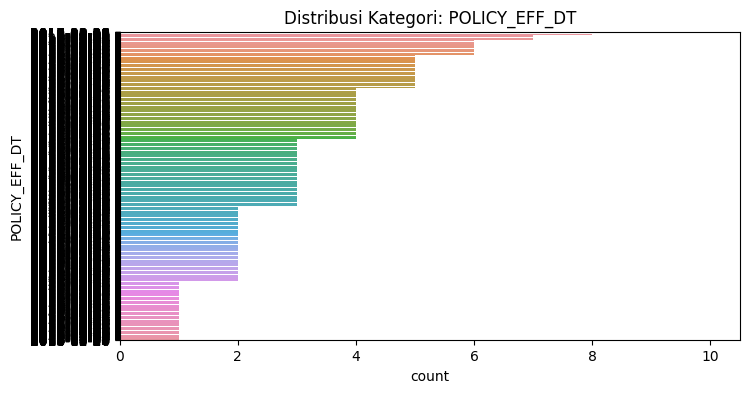

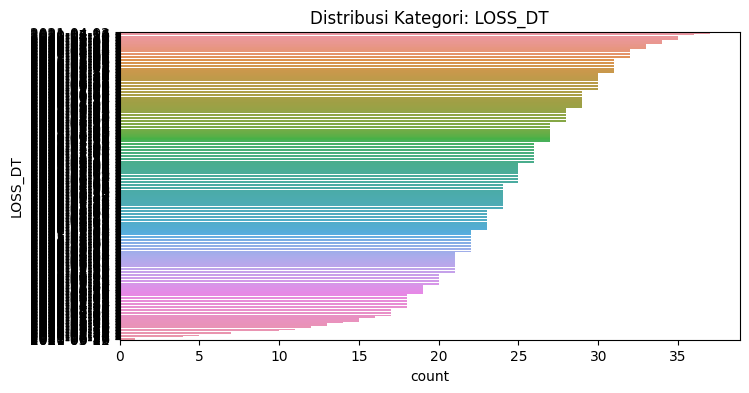

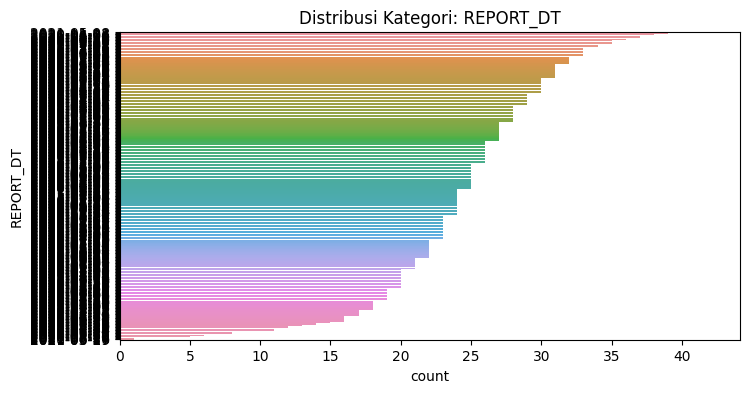

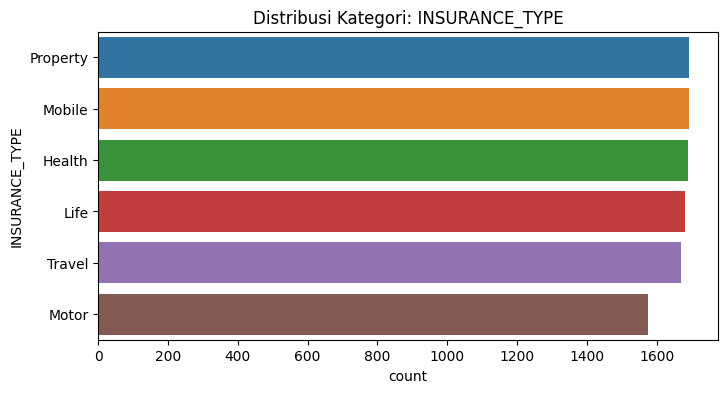

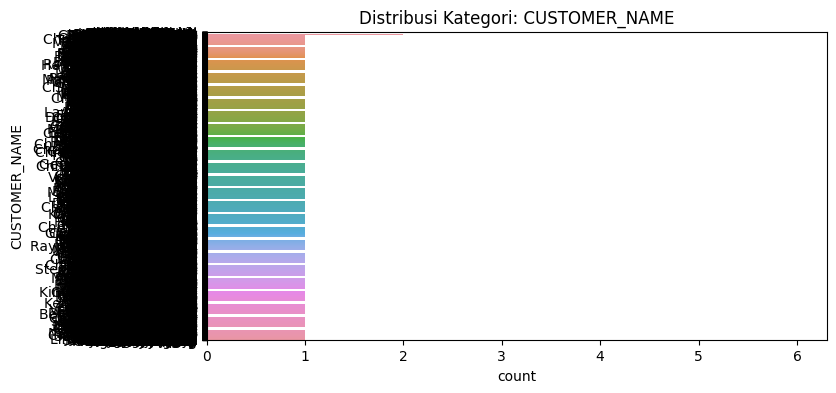

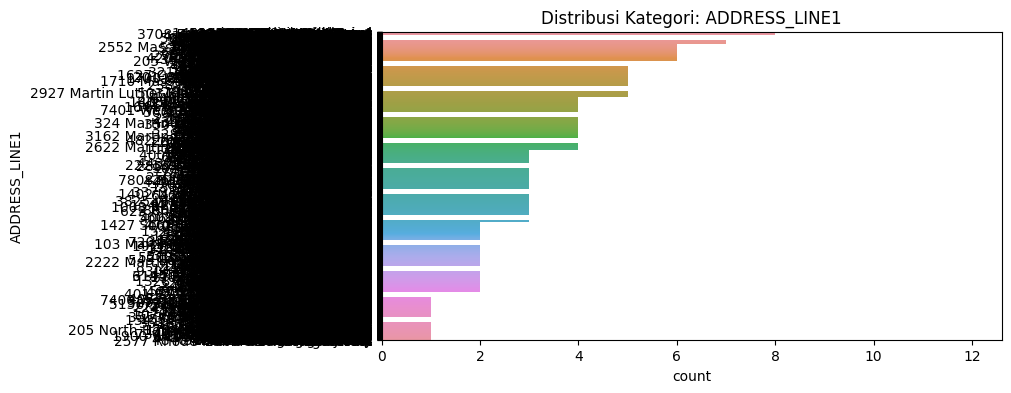

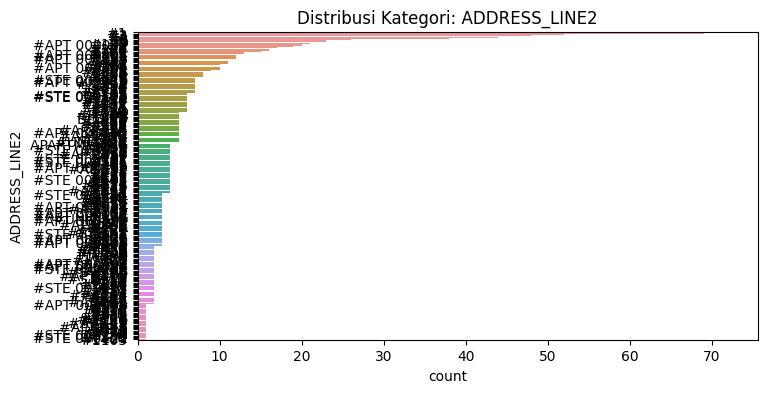

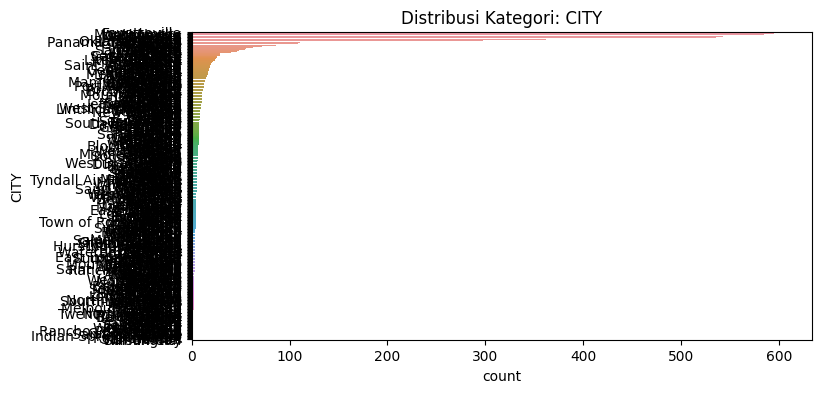

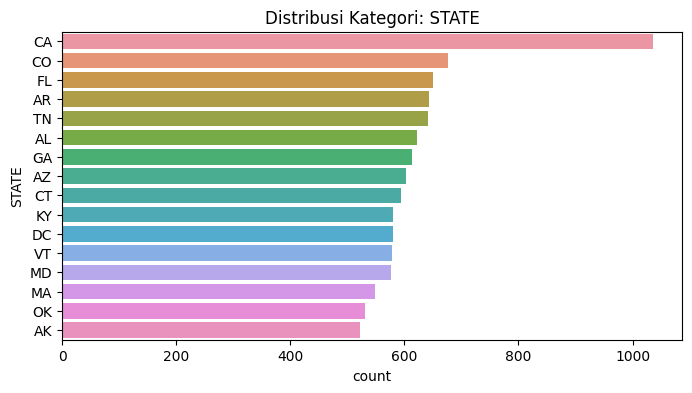

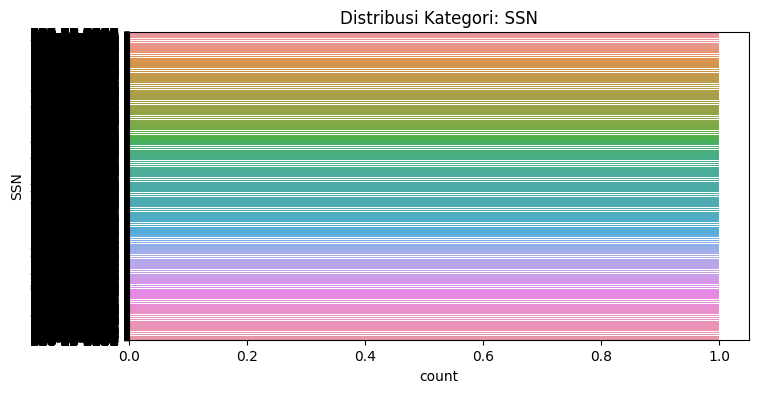

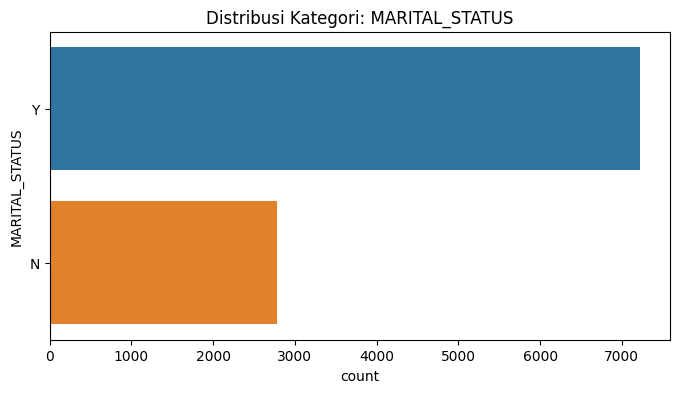

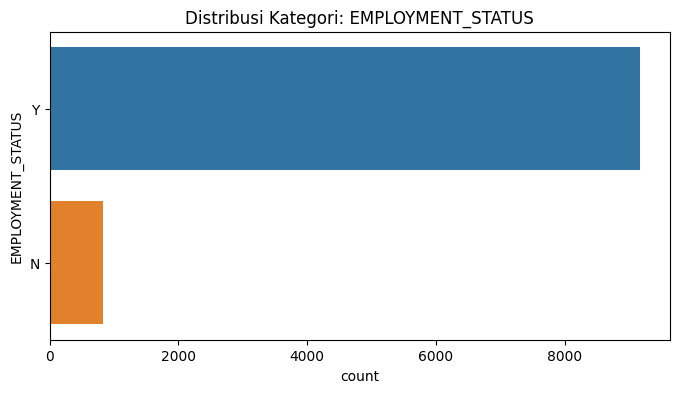

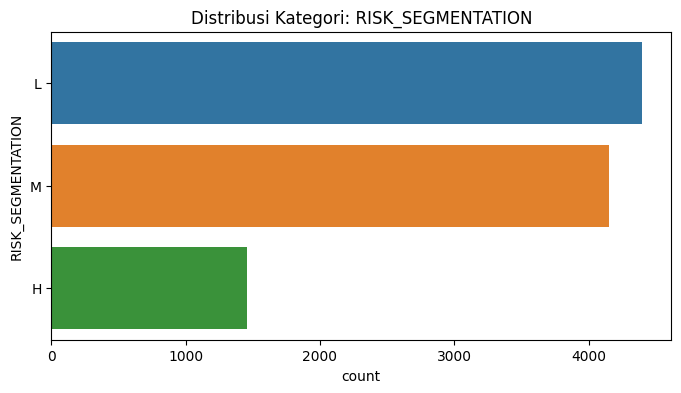

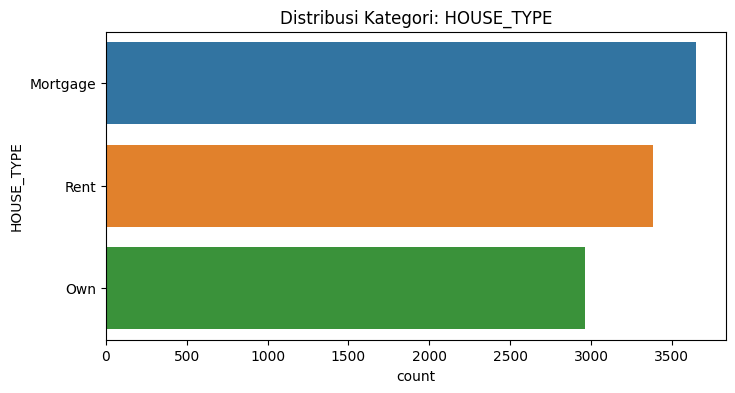

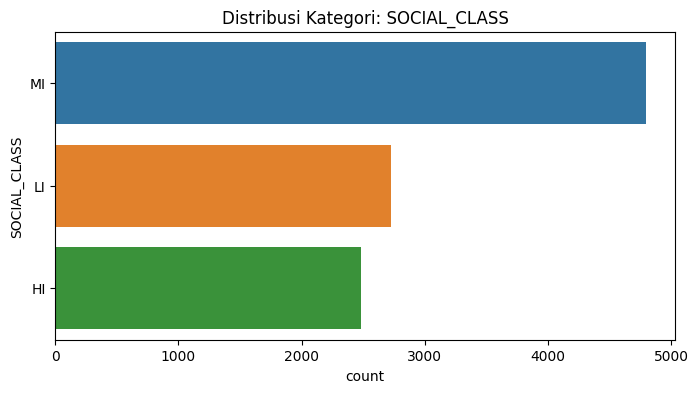

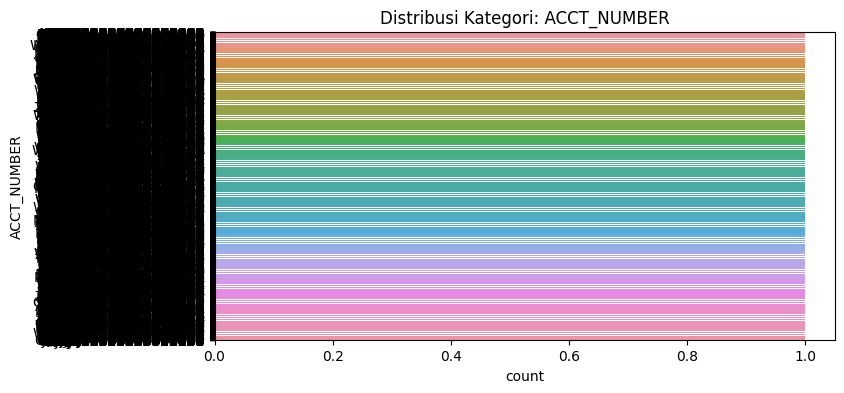

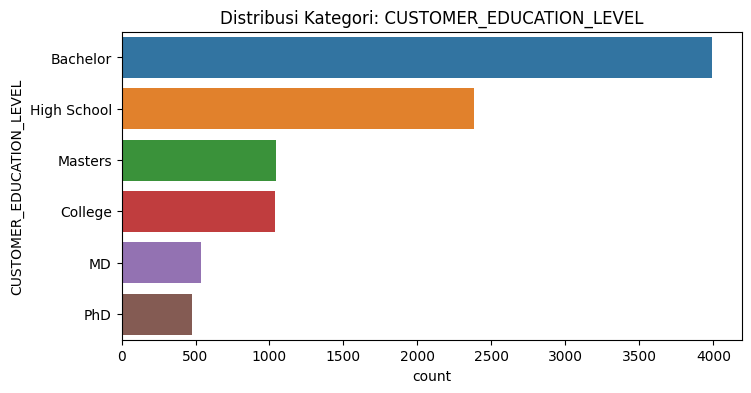

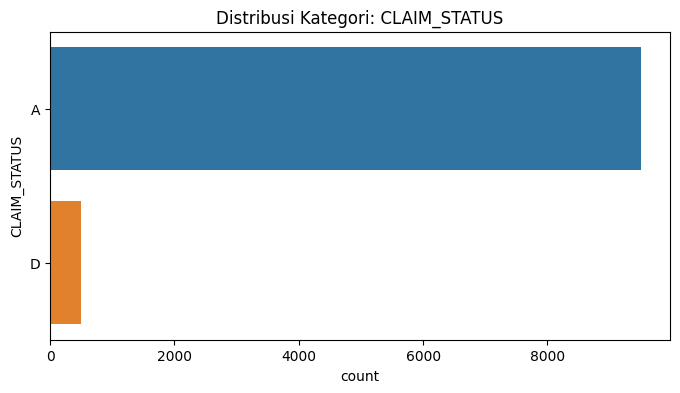

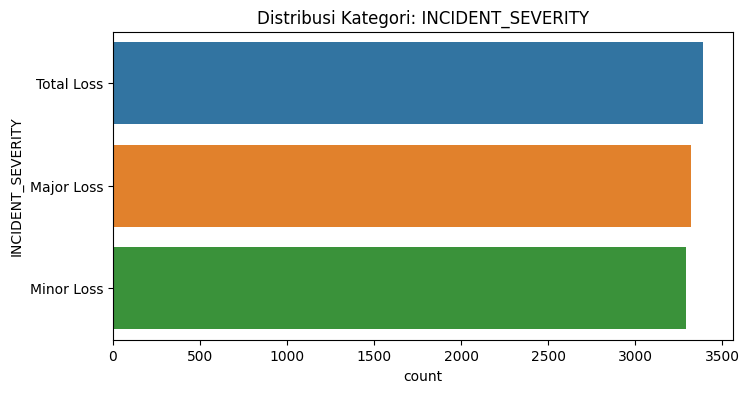

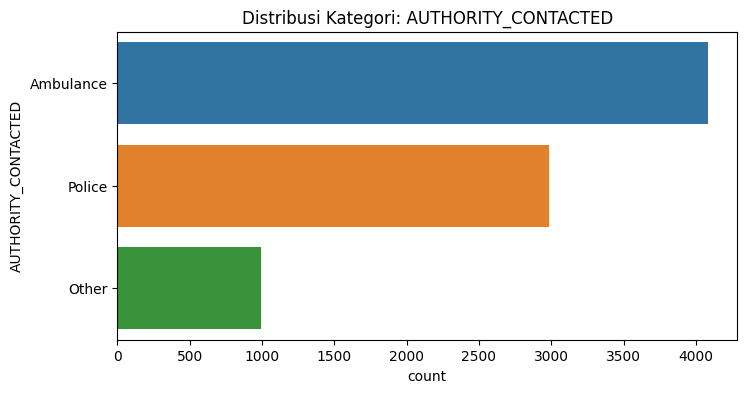

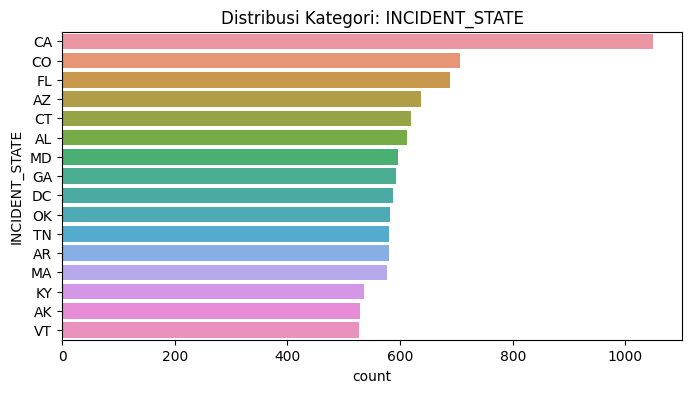

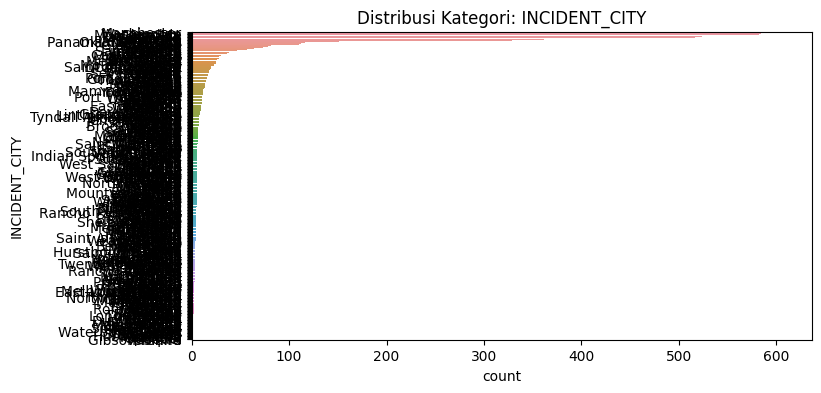

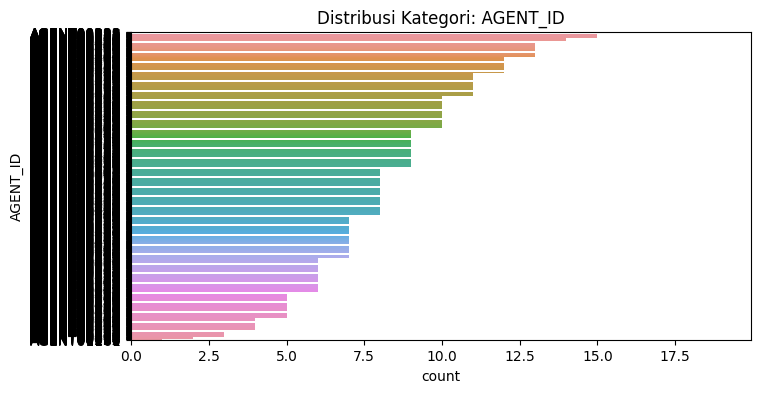

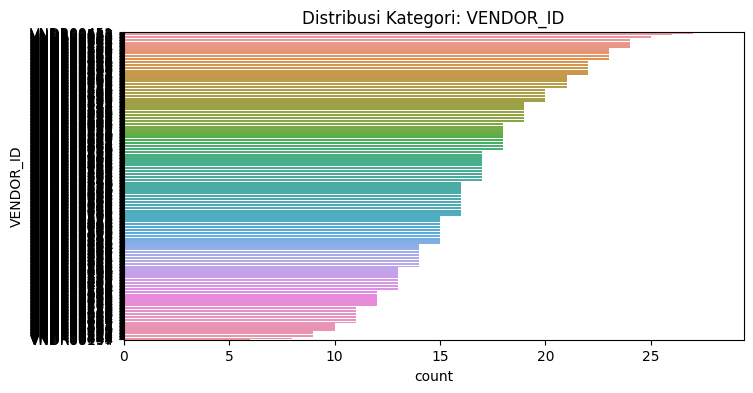


========== EDA untuk Employee Data ==========

1. Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AGENT_ID            1200 non-null   object
 1   AGENT_NAME          1200 non-null   object
 2   DATE_OF_JOINING     1200 non-null   object
 3   ADDRESS_LINE1       1200 non-null   object
 4   ADDRESS_LINE2       179 non-null    object
 5   CITY                1193 non-null   object
 6   STATE               1200 non-null   object
 7   POSTAL_CODE         1200 non-null   int64 
 8   EMP_ROUTING_NUMBER  1200 non-null   int64 
 9   EMP_ACCT_NUMBER     1200 non-null   object
dtypes: int64(2), object(8)
memory usage: 93.9+ KB
None

2. 5 baris pertama:
     AGENT_ID      AGENT_NAME DATE_OF_JOINING          ADDRESS_LINE1  \
0  AGENT00001       Ray Johns      1993-06-05       1402 Maggies Way   
1  AGENT00002   Angelo Borjon  

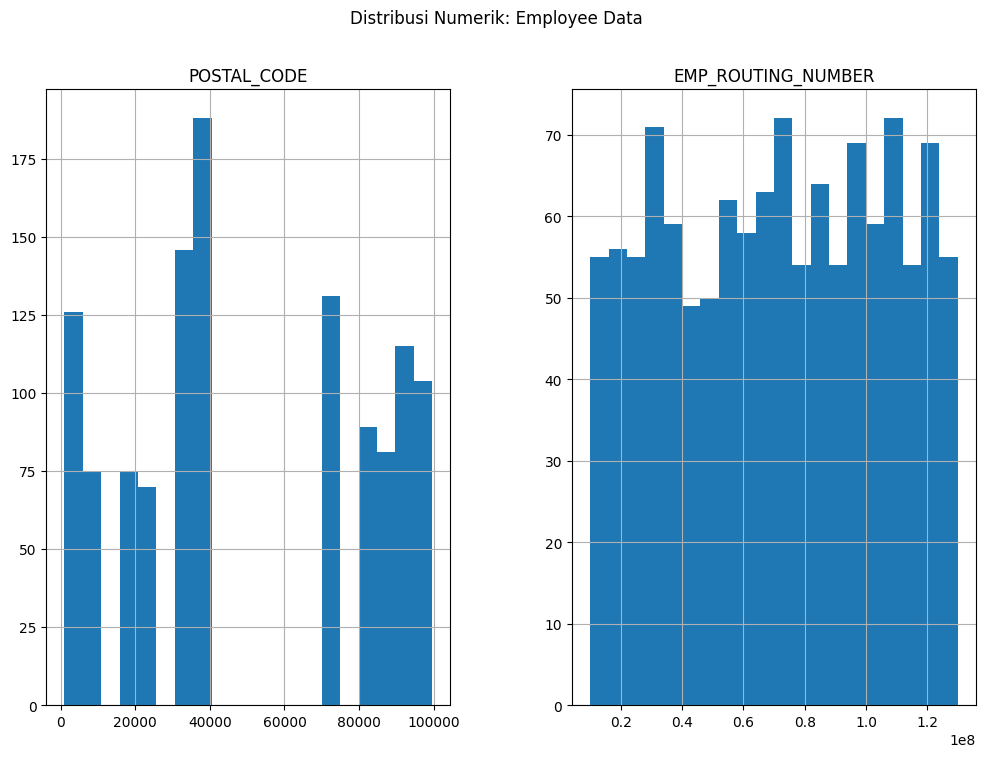

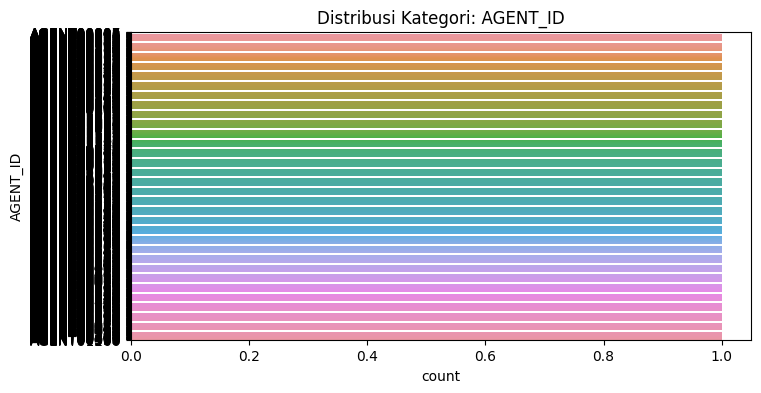

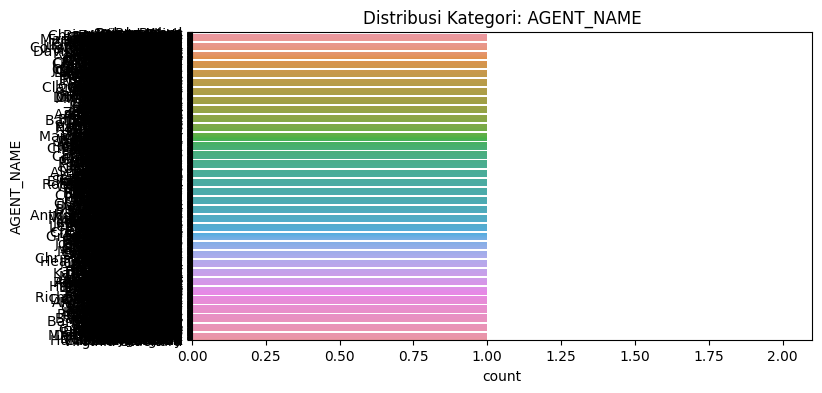

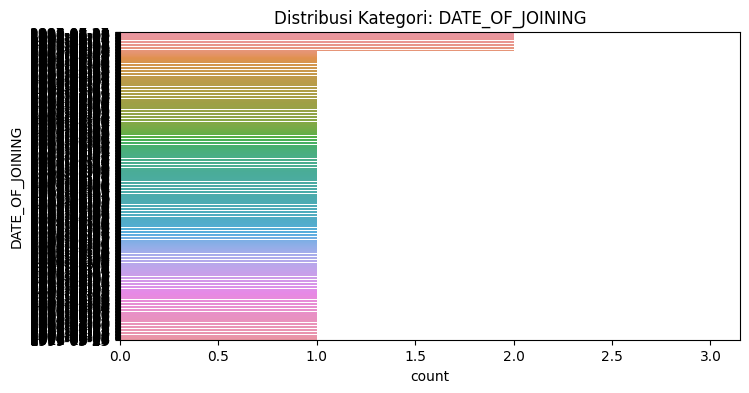

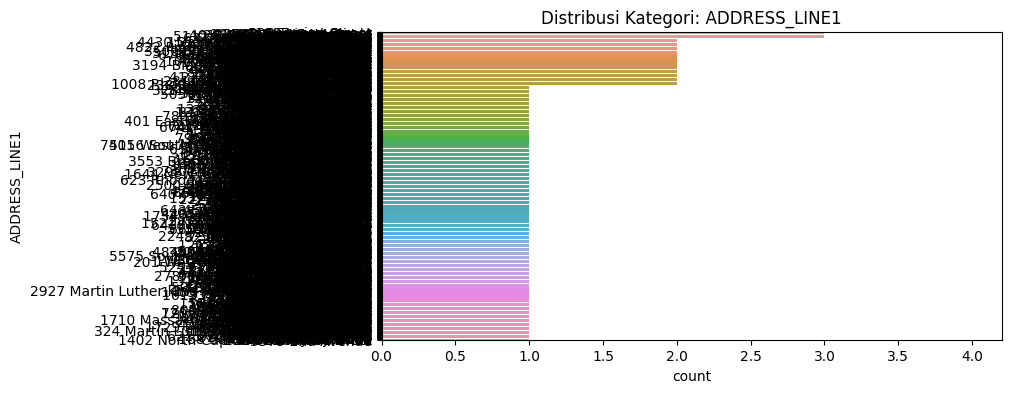

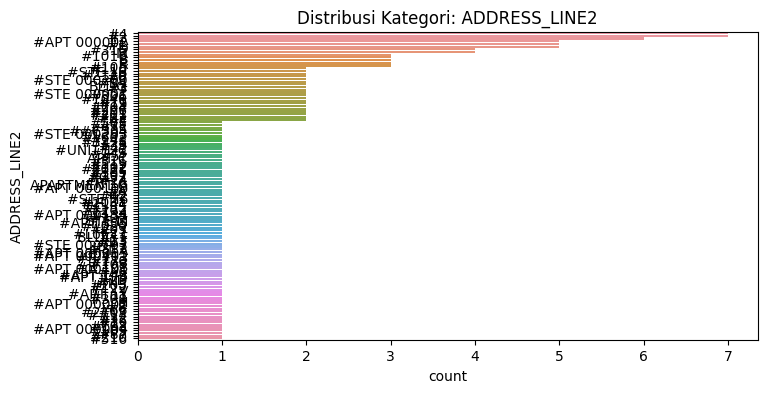

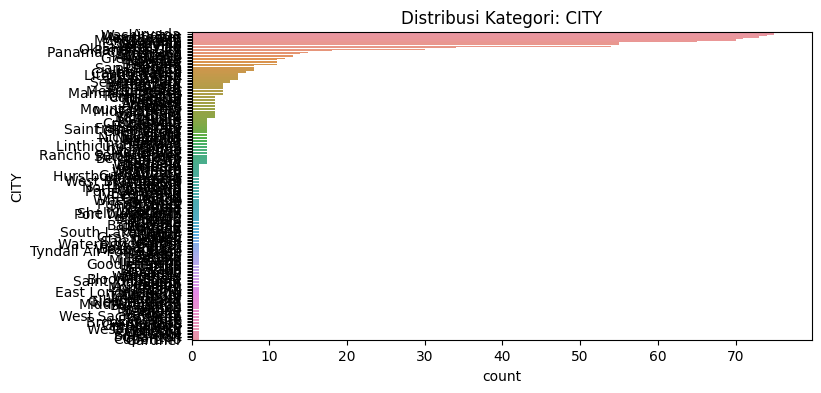

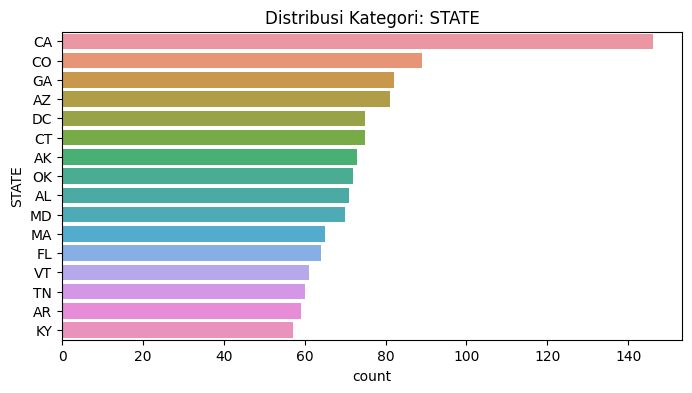

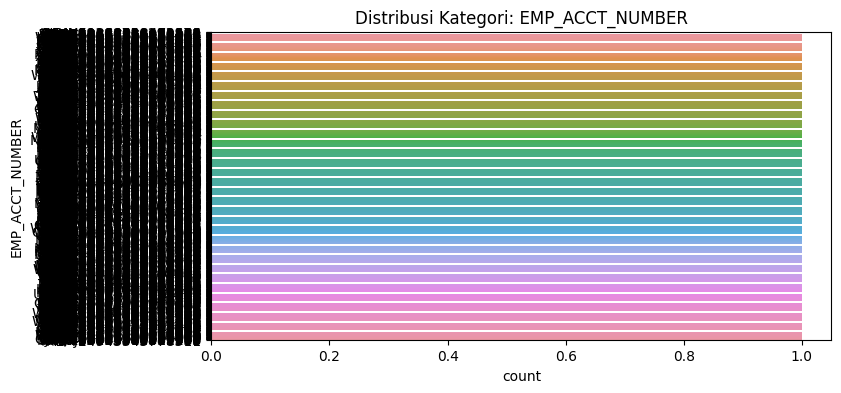

In [3]:
# Library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
vendor_df = pd.read_csv('/kaggle/input/insurance-claims-fraud-data/vendor_data.csv')
insurance_df = pd.read_csv('/kaggle/input/insurance-claims-fraud-data/insurance_data.csv')
employee_df = pd.read_csv('/kaggle/input/insurance-claims-fraud-data/employee_data.csv')

# Fungsi EDA sederhana
def eda_summary(df, name):
    print(f"\n========== EDA untuk {name} ==========")
    print("\n1. Info dataset:")
    print(df.info())
    
    print("\n2. 5 baris pertama:")
    print(df.head())
    
    print("\n3. Statistik deskriptif numerik:")
    print(df.describe())
    
    print("\n4. Statistik deskriptif kategori:")
    print(df.describe(include=['object']))
    
    print("\n5. Missing values:")
    print(df.isnull().sum())
    
    # Visualisasi distribusi numerik
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    if numeric_cols:
        df[numeric_cols].hist(figsize=(12,8), bins=20)
        plt.suptitle(f'Distribusi Numerik: {name}')
        plt.show()
    
    # Visualisasi kategori
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    for col in cat_cols:
        plt.figure(figsize=(8,4))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Distribusi Kategori: {col}')
        plt.show()

# Jalankan EDA untuk semua dataset
eda_summary(vendor_df, "Vendor Data")
eda_summary(insurance_df, "Insurance Data")
eda_summary(employee_df, "Employee Data")


========== EDA Lanjutan untuk Vendor Data ==========

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VENDOR_ID      600 non-null    object
 1   VENDOR_NAME    600 non-null    object
 2   ADDRESS_LINE1  600 non-null    object
 3   ADDRESS_LINE2  97 non-null     object
 4   CITY           594 non-null    object
 5   STATE          600 non-null    object
 6   POSTAL_CODE    600 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.9+ KB
None

Missing values:
VENDOR_ID          0
VENDOR_NAME        0
ADDRESS_LINE1      0
ADDRESS_LINE2    503
CITY               6
STATE              0
POSTAL_CODE        0
dtype: int64

Statistik numerik:
        POSTAL_CODE
count    600.000000
mean   48897.900000
std    32595.256693
min     1028.000000
25%    21122.000000
50%    37211.000000
75%    80003.250000
max    99603.000000

Statis

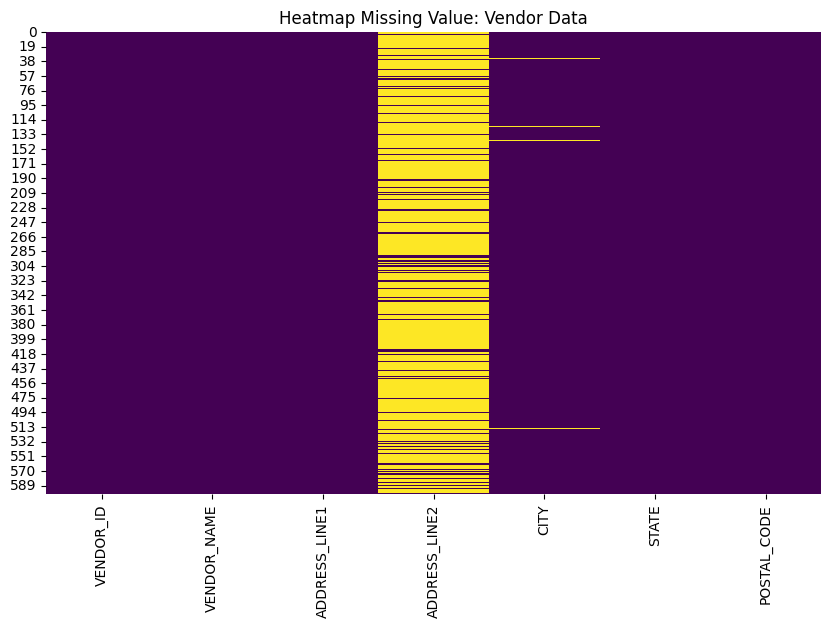

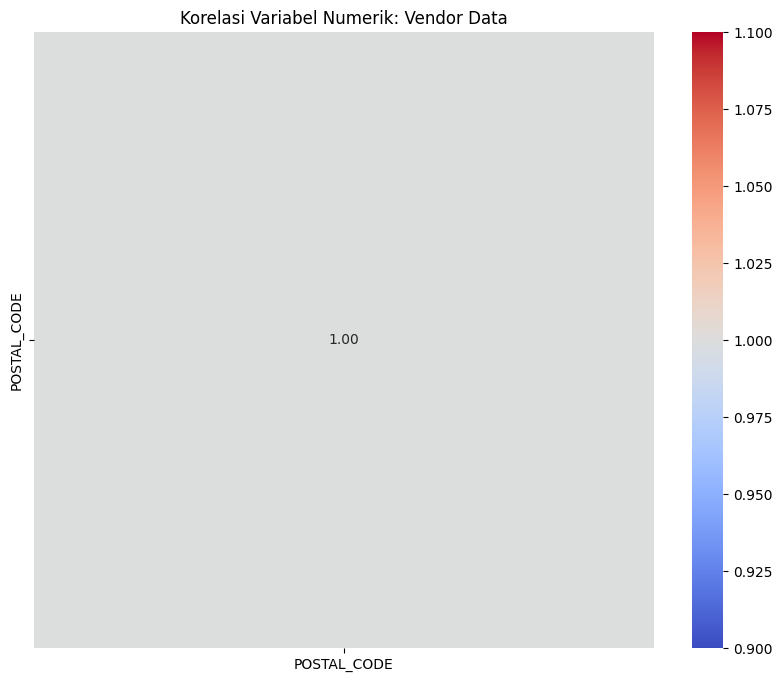

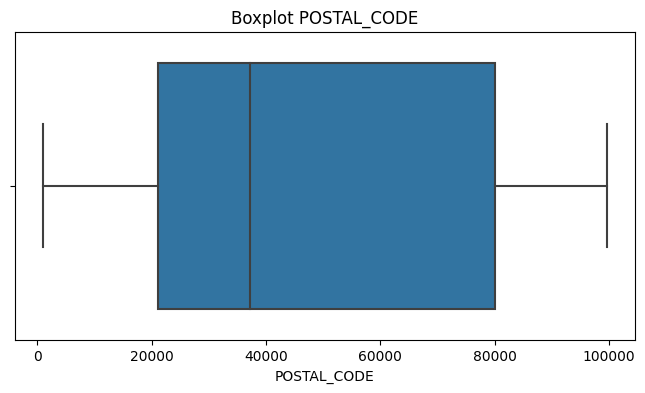


========== EDA Lanjutan untuk Employee Data ==========

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AGENT_ID            1200 non-null   object
 1   AGENT_NAME          1200 non-null   object
 2   DATE_OF_JOINING     1200 non-null   object
 3   ADDRESS_LINE1       1200 non-null   object
 4   ADDRESS_LINE2       179 non-null    object
 5   CITY                1193 non-null   object
 6   STATE               1200 non-null   object
 7   POSTAL_CODE         1200 non-null   int64 
 8   EMP_ROUTING_NUMBER  1200 non-null   int64 
 9   EMP_ACCT_NUMBER     1200 non-null   object
dtypes: int64(2), object(8)
memory usage: 93.9+ KB
None

Missing values:
AGENT_ID                 0
AGENT_NAME               0
DATE_OF_JOINING          0
ADDRESS_LINE1            0
ADDRESS_LINE2         1021
CITY                     7
STATE      

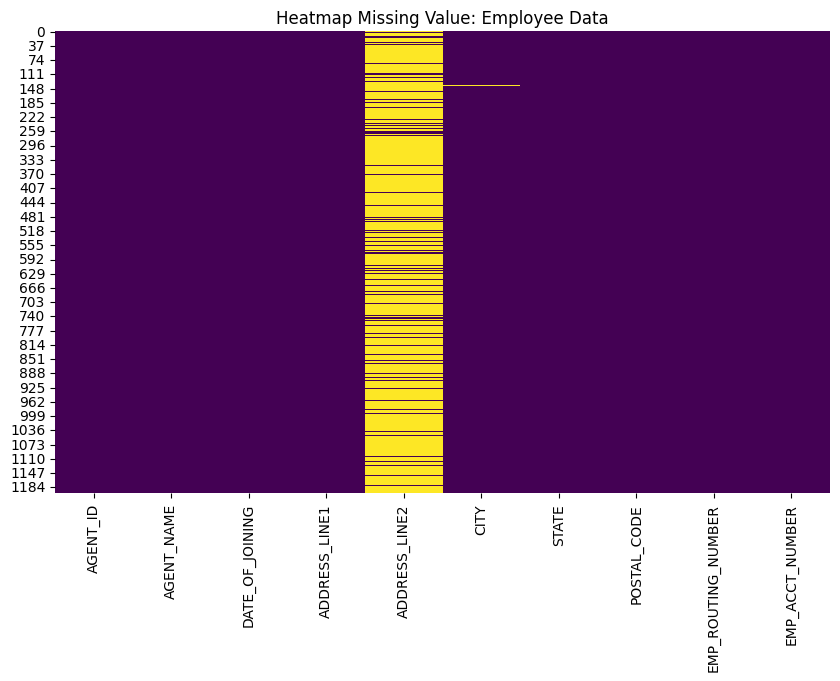

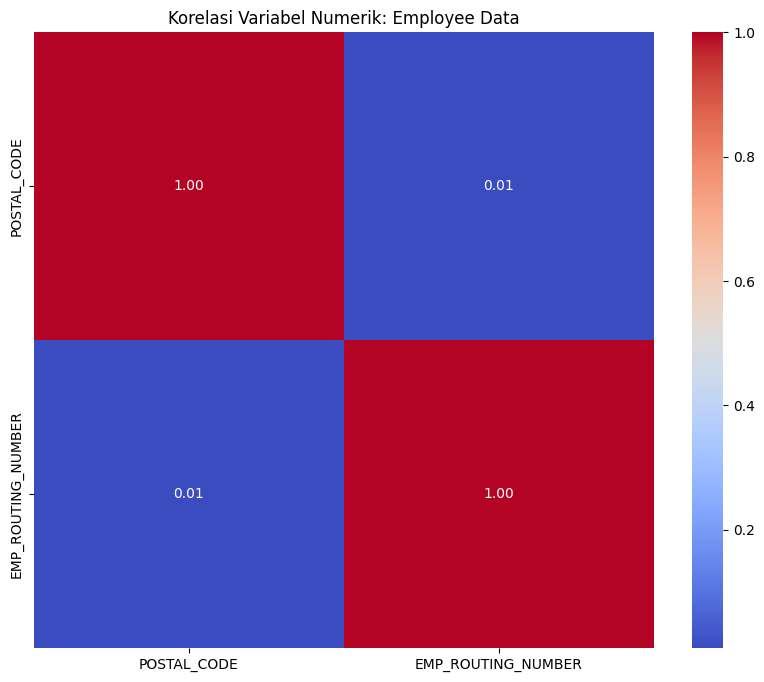

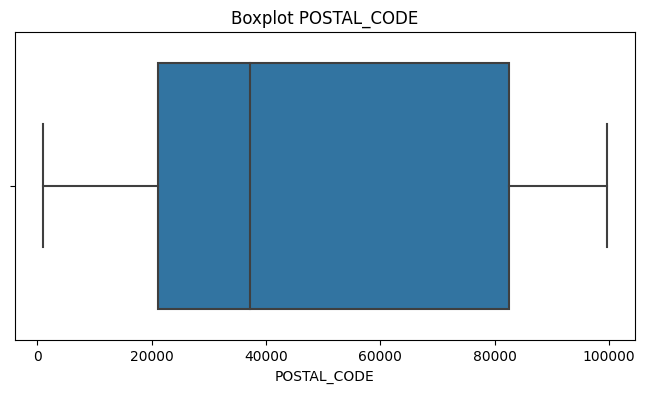

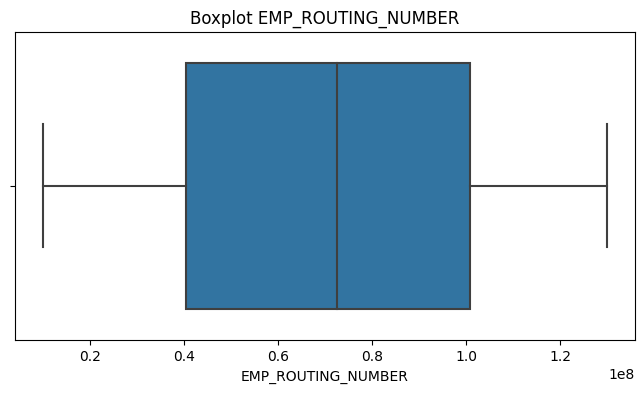


========== EDA Lanjutan untuk Insurance Data ==========

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             1495 non-null   obj

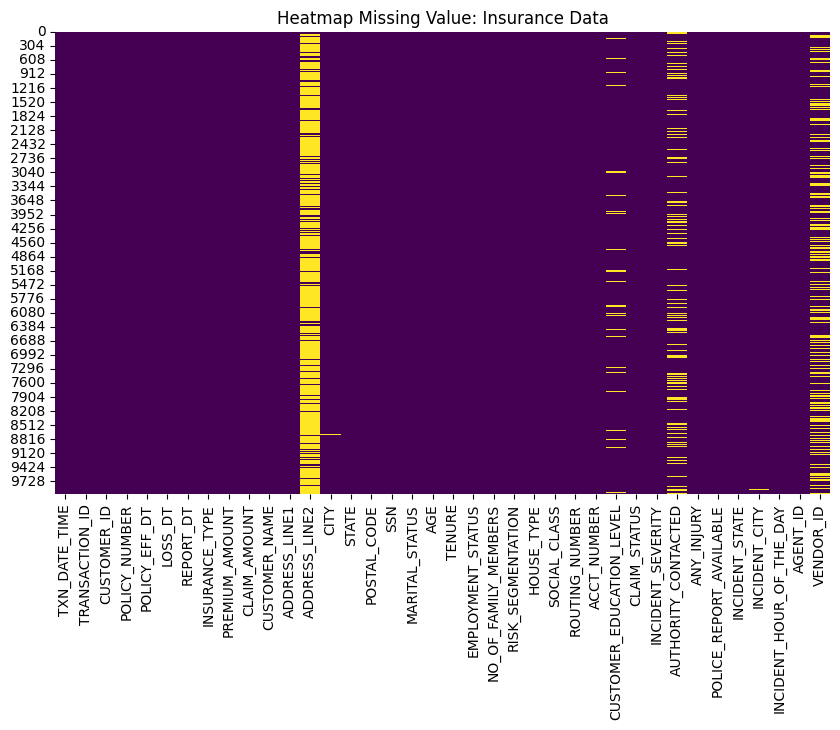

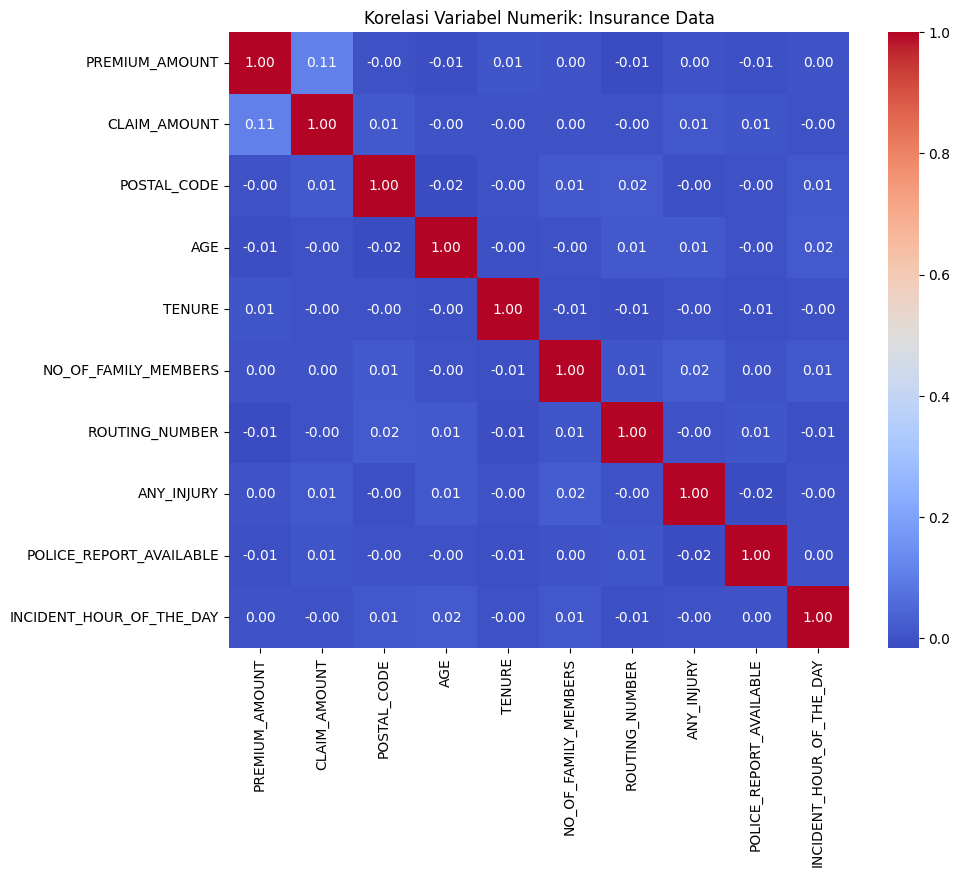

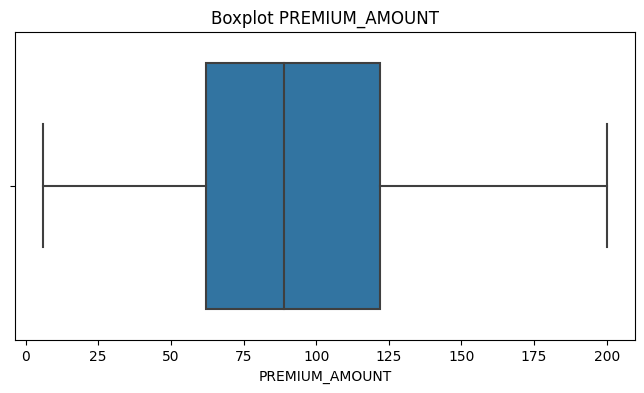

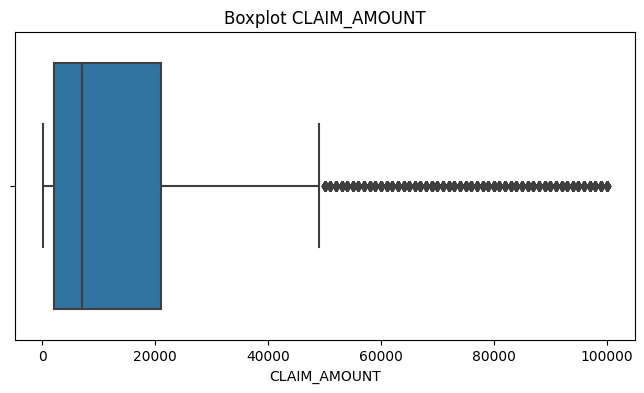

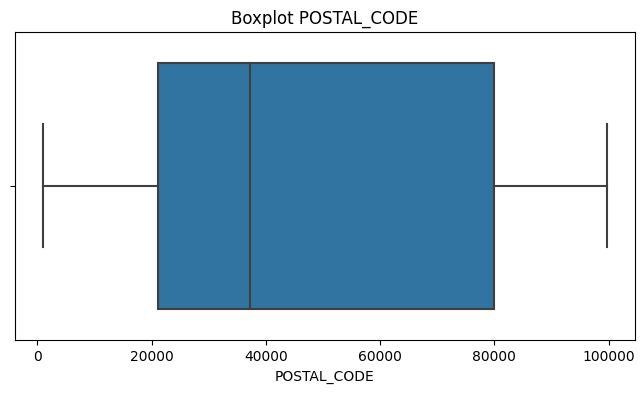

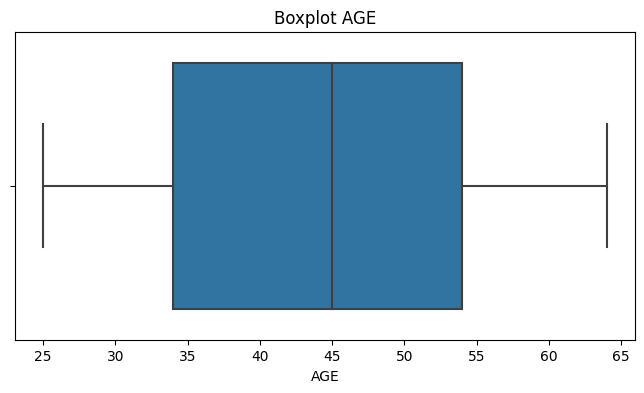

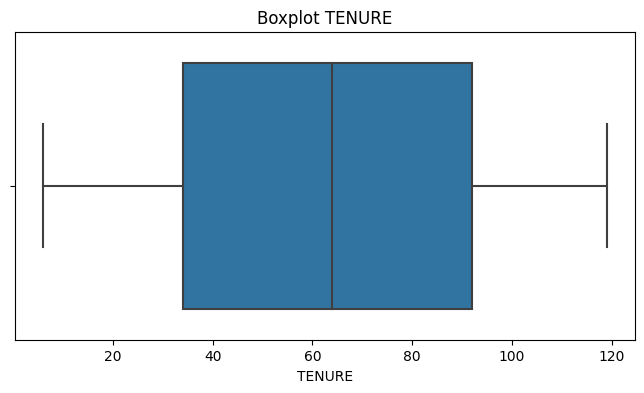

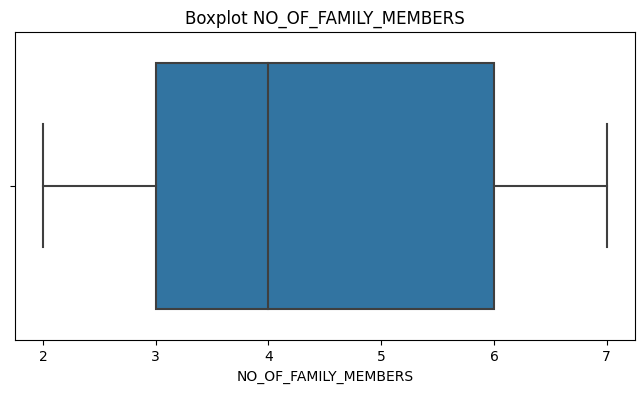

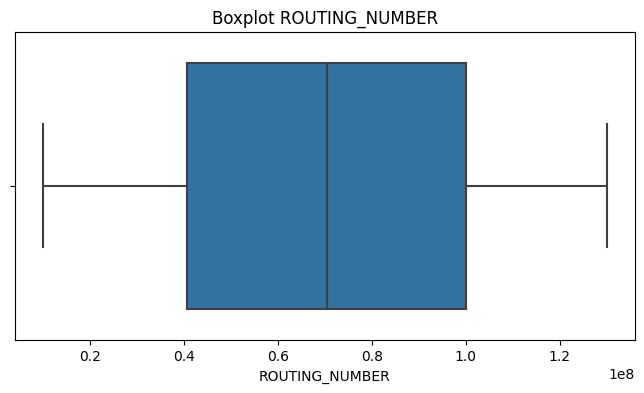

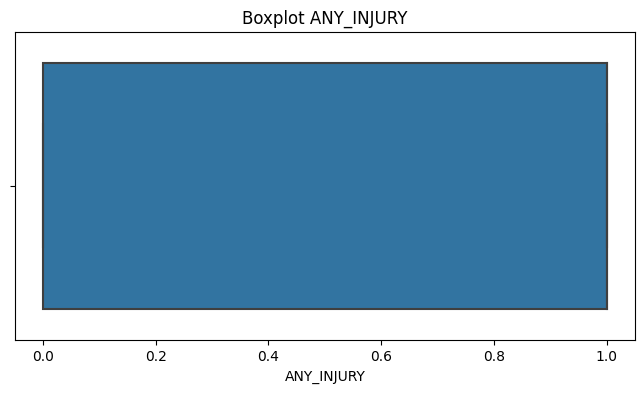

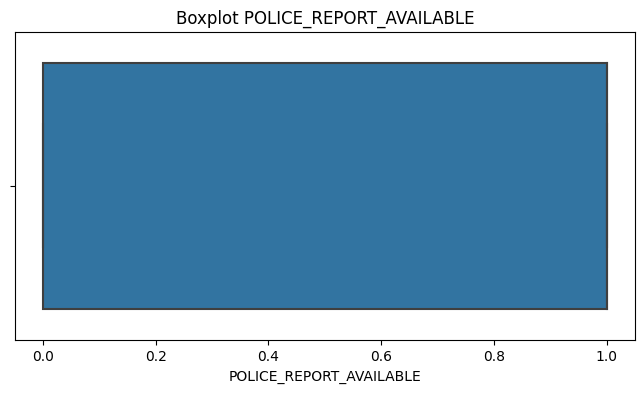

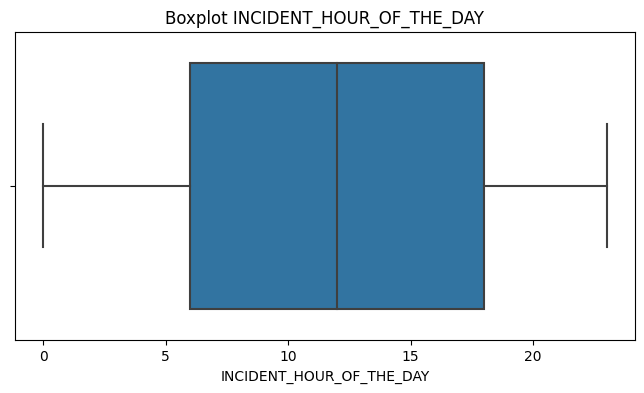

In [4]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
vendor_df = pd.read_csv('/kaggle/input/insurance-claims-fraud-data/vendor_data.csv')
insurance_df = pd.read_csv('/kaggle/input/insurance-claims-fraud-data/insurance_data.csv')
employee_df = pd.read_csv('/kaggle/input/insurance-claims-fraud-data/employee_data.csv')

# Fungsi EDA lanjutan
def eda_advanced(df, name, target=None):
    print(f"\n========== EDA Lanjutan untuk {name} ==========")
    
    # 1. Info & missing
    print("\nInfo dataset:")
    print(df.info())
    
    print("\nMissing values:")
    print(df.isnull().sum())
    
    # 2. Statistik numerik & kategori
    print("\nStatistik numerik:")
    print(df.describe())
    
    print("\nStatistik kategori:")
    print(df.describe(include=['object']))
    
    # 3. Heatmap missing value
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(f"Heatmap Missing Value: {name}")
    plt.show()
    
    # 4. Korelasi numerik
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    if numeric_cols:
        plt.figure(figsize=(10,8))
        sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
        plt.title(f"Korelasi Variabel Numerik: {name}")
        plt.show()
    
    # 5. Boxplot untuk deteksi outlier
    for col in numeric_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot {col}")
        plt.show()
    
    # 6. Distribusi target jika ada
    if target and target in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x=df[target])
        plt.title(f"Distribusi Target: {target}")
        plt.show()

# Jalankan EDA lanjutan
# Misal kolom target di insurance_df adalah 'fraud_reported' (ubah sesuai dataset)
eda_advanced(vendor_df, "Vendor Data")
eda_advanced(employee_df, "Employee Data")
eda_advanced(insurance_df, "Insurance Data", target='fraud_reported')

In [5]:
# Library
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Load dataset
vendor_df = pd.read_csv('/kaggle/input/insurance-claims-fraud-data/vendor_data.csv')
insurance_df = pd.read_csv('/kaggle/input/insurance-claims-fraud-data/insurance_data.csv')
employee_df = pd.read_csv('/kaggle/input/insurance-claims-fraud-data/employee_data.csv')

# Fungsi EDA interaktif
def eda_interactive(df, name, target=None):
    print(f"\n========== EDA Interaktif untuk {name} ==========")
    
    # 1. Informasi dasar
    display(df.head())
    display(df.info())
    display(df.describe())
    
    # 2. Missing value interaktif
    missing = df.isnull().sum().reset_index()
    missing.columns = ['Column', 'MissingCount']
    fig = px.bar(missing, x='Column', y='MissingCount', title=f'Missing Values: {name}', text='MissingCount')
    fig.show()
    
    # 3. Korelasi interaktif (hanya numerik)
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    if len(numeric_cols) > 1:
        corr = df[numeric_cols].corr()
        fig = ff.create_annotated_heatmap(
            z=corr.values,
            x=list(corr.columns),
            y=list(corr.index),
            annotation_text=np.round(corr.values,2),
            colorscale='Viridis'
        )
        fig.update_layout(title_text=f"Korelasi Numerik: {name}", width=800, height=600)
        fig.show()
    
    # 4. Boxplot interaktif numerik
    for col in numeric_cols:
        fig = px.box(df, y=col, title=f'Boxplot Interaktif: {col}')
        fig.show()
    
    # 5. Distribusi target interaktif
    if target and target in df.columns:
        fig = px.histogram(df, x=target, title=f'Distribusi Target: {target}', text_auto=True)
        fig.show()
    
    # 6. Scatter interaktif (opsional) untuk numeric pair
    if len(numeric_cols) >= 2:
        fig = px.scatter_matrix(df, dimensions=numeric_cols, color=target if target in df.columns else None,
                                title=f'Scatter Matrix Interaktif: {name}')
        fig.update_layout(width=900, height=900)
        fig.show()

# Jalankan EDA interaktif
eda_interactive(vendor_df, "Vendor Data")
eda_interactive(employee_df, "Employee Data")
eda_interactive(insurance_df, "Insurance Data", target='fraud_reported')


========== EDA Interaktif untuk Vendor Data ==========


VENDOR_ID              VENDOR_NAME                   ADDRESS_LINE1  \
0  VNDR00001  King, Proctor and Jones        2027 North Shannon Drive   
1  VNDR00002               Garcia Ltd          5701 East Shirley Lane   
2  VNDR00003               Cherry LLC            1217 Cottondale Road   
3  VNDR00004              Mays-Benson  227 West Montgomery Cross Road   
4  VNDR00005               Wilson PLC            23 North Hill Street   

  ADDRESS_LINE2          CITY STATE  POSTAL_CODE  
0            #5  Fayetteville    AR        72703  
1           NaN    Montgomery    AL        36117  
2           NaN    Montgomery    AL        36109  
3          #736      Savannah    GA        31406  
4           NaN     Nashville    TN        37210

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VENDOR_ID      600 non-null    object
 1   VENDOR_NAME    600 non-null    object
 2   ADDRESS_LINE1  600 non-null    object
 3   ADDRESS_LINE2  97 non-null     object
 4   CITY           594 non-null    object
 5   STATE          600 non-null    object
 6   POSTAL_CODE    600 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.9+ KB


None

POSTAL_CODE
count    600.000000
mean   48897.900000
std    32595.256693
min     1028.000000
25%    21122.000000
50%    37211.000000
75%    80003.250000
max    99603.000000


========== EDA Interaktif untuk Employee Data ==========


AGENT_ID      AGENT_NAME DATE_OF_JOINING          ADDRESS_LINE1  \
0  AGENT00001       Ray Johns      1993-06-05       1402 Maggies Way   
1  AGENT00002   Angelo Borjon      2005-12-27         414 Tanya Pass   
2  AGENT00003  Candy Spellman      2003-09-02    606 National Street   
3  AGENT00004      Mary Smith      2004-09-23  235 Hugh Thomas Drive   
4  AGENT00005    Mildred Diaz      2011-06-21  3426 Broadview Street   

  ADDRESS_LINE2              CITY STATE  POSTAL_CODE  EMP_ROUTING_NUMBER  \
0           NaN  Waterbury Center    VT         5677            34584958   
1           NaN       Panama City    FL        32404           107363763   
2          #306      Fayetteville    AR        72701            81744097   
3           NaN       Panama City    FL        32404            67563771   
4           NaN        Montgomery    AL        36110           114951317   

      EMP_ACCT_NUMBER  
0  HKUN51252328472585  
1  OPIS19290040088204  
2  YSCJ67489688482590  
3  ZANG21285355574581  
4  DZFS82244494451134

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AGENT_ID            1200 non-null   object
 1   AGENT_NAME          1200 non-null   object
 2   DATE_OF_JOINING     1200 non-null   object
 3   ADDRESS_LINE1       1200 non-null   object
 4   ADDRESS_LINE2       179 non-null    object
 5   CITY                1193 non-null   object
 6   STATE               1200 non-null   object
 7   POSTAL_CODE         1200 non-null   int64 
 8   EMP_ROUTING_NUMBER  1200 non-null   int64 
 9   EMP_ACCT_NUMBER     1200 non-null   object
dtypes: int64(2), object(8)
memory usage: 93.9+ KB


None

POSTAL_CODE  EMP_ROUTING_NUMBER
count   1200.000000        1.200000e+03
mean   50220.733333        7.098849e+07
std    33388.345995        3.446728e+07
min     1007.000000        1.002215e+07
25%    21103.500000        4.042720e+07
50%    37209.500000        7.252639e+07
75%    82510.250000        1.009398e+08
max    99577.000000        1.299226e+08


========== EDA Interaktif untuk Insurance Data ==========


TXN_DATE_TIME TRANSACTION_ID CUSTOMER_ID POLICY_NUMBER POLICY_EFF_DT  \
0  2020-06-01 00:00:00    TXN00000001   A00003822   PLC00008468    2015-06-23   
1  2020-06-01 00:00:00    TXN00000002   A00008149   PLC00009594    2018-04-21   
2  2020-06-01 00:00:00    TXN00000003   A00003172   PLC00007969    2019-10-03   
3  2020-06-01 00:00:00    TXN00000004   A00007572   PLC00009292    2016-11-29   
4  2020-06-01 00:00:00    TXN00000005   A00008173   PLC00000204    2011-12-26   

      LOSS_DT   REPORT_DT INSURANCE_TYPE  PREMIUM_AMOUNT  CLAIM_AMOUNT  ...  \
0  2020-05-16  2020-05-21         Health          157.13          9000  ...   
1  2020-05-13  2020-05-18       Property          141.71         26000  ...   
2  2020-05-21  2020-05-26       Property          157.24         13000  ...   
3  2020-05-14  2020-05-19         Health          172.87         16000  ...   
4  2020-05-17  2020-05-22         Travel           88.53          3000  ...   

  CLAIM_STATUS INCIDENT_SEVERITY AUTHORITY_CONTACTED ANY_INJURY  \
0            A        Major Loss              Police          0   
1            A        Total Loss           Ambulance          1   
2            A        Total Loss              Police          0   
3            A        Minor Loss           Ambulance          0   
4            A        Major Loss              Police          0   

  POLICE_REPORT_AVAILABLE  INCIDENT_STATE   INCIDENT_CITY  \
0                       1              GA        Savannah   
1                       0              AL      Montgomery   
2                       1              CO  Grand Junction   
3                       0              GA        Savannah   
4                       1              TN       Nashville   

  INCIDENT_HOUR_OF_THE_DAY    AGENT_ID  VENDOR_ID  
0                        4  AGENT00413  VNDR00556  
1                        0  AGENT00769  VNDR00592  
2                       19  AGENT00883  VNDR00031  
3                       12  AGENT00278  VNDR00075  
4                       18  AGENT00636  VNDR00472  

[5 rows x 38 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             1495 non-null   object 
 13  CITY                      9946 non-null   object 
 14  STATE  

None

PREMIUM_AMOUNT   CLAIM_AMOUNT   POSTAL_CODE           AGE  \
count    10000.000000   10000.000000  10000.000000  10000.000000   
mean        88.508595   16563.830000  48288.830500     44.466100   
std         48.315874   22037.489735  32467.389801     11.516827   
min          6.000000     100.000000   1001.000000     25.000000   
25%         62.015000    2000.000000  21061.000000     34.000000   
50%         88.835000    7000.000000  37206.000000     45.000000   
75%        121.902500   21000.000000  80004.000000     54.000000   
max        200.000000  100000.000000  99669.000000     64.000000   

             TENURE  NO_OF_FAMILY_MEMBERS  ROUTING_NUMBER    ANY_INJURY  \
count  10000.000000          10000.000000    1.000000e+04  10000.000000   
mean      62.949800              4.488400    7.052882e+07      0.699100   
std       32.890604              1.712588    3.451879e+07      0.458672   
min        6.000000              2.000000    1.000074e+07      0.000000   
25%       34.000000              3.000000    4.071761e+07      0.000000   
50%       64.000000              4.000000    7.036614e+07      1.000000   
75%       92.000000              6.000000    1.000638e+08      1.000000   
max      119.000000              7.000000    1.299981e+08      1.000000   

       POLICE_REPORT_AVAILABLE  INCIDENT_HOUR_OF_THE_DAY  
count             10000.000000              10000.000000  
mean                  0.692800                 11.604000  
std                   0.461356                  6.877101  
min                   0.000000                  0.000000  
25%                   0.000000                  6.000000  
50%                   1.000000                 12.000000  
75%                   1.000000                 18.000000  
max                   1.000000                 23.000000